<a href="https://colab.research.google.com/github/etrompetam/Codigo/blob/main/Cadena_elem_compresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

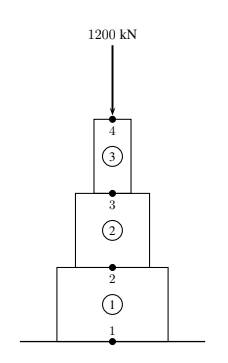

##Cadena de elementos en compresión##
Consideremos la estructura mostrada en la figura anterior, que consiste en tres elementos de diferente área seccional sometidos a una carga de compresión de valor $1200 kN$. Las áreas de los elementos son
$A_1 = 0,25$, $A_2 = 0,16$ y $A3 = 0,09 m^2$ , mientras que el módulo de elasticidad es $E = 2×107kN/m^2$ para todos ellos. Por tanto, las matrices de rigidez son:

$$ k_e = \dfrac{EA_e}{l_e} \begin{equation}
\begin{pmatrix}
 1  & -1\\
-1  &  1
\end{pmatrix}
\end{equation} $$

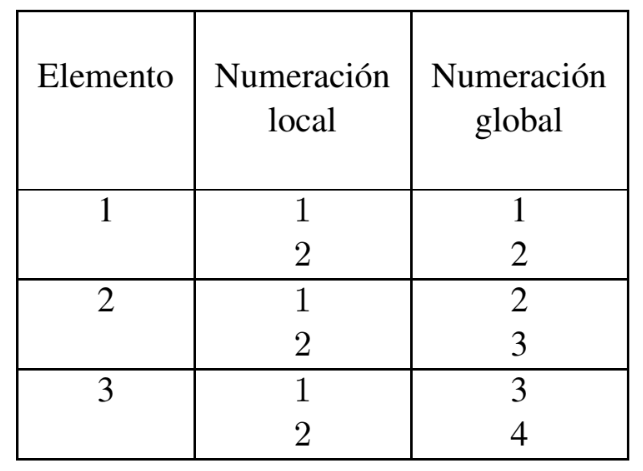

In [1]:
import numpy as np
# Se definen los datos del problema
E = 2e7;  A_1 = 0.25;  A_2 = 0.16;  A_3 = 0.09

In [2]:
# Se define la matriz de rigidez
ke = np.array([[ 1,  -1],
               [-1,   1]])


In [3]:
# Con la informacion ya dada, las matrices de rigidez elementales son:
k_1 = E * A_1*ke
k_2 = E * A_2*ke
k_3 = E * A_3*ke
k_2

array([[ 3200000., -3200000.],
       [-3200000.,  3200000.]])

En vista de que el número total de grados de libertad es igual a cuatro, para formar la matriz de
rigidez global K inicialmente la creamos como una matriz nula de tamaño 4 × 4:

In [4]:
K =np.zeros((4, 4))

Para incorporar la información del elemento 1, creamos un vector que informa los grados de libertad
en numeración global que reúne este elemento:

In [5]:
g_1 = [0, 1]


A continuación, creamos la matriz $∆K_1$ que traslada la contribución del elemento, de la numeración
local a la global:

In [6]:
DeltaK_1 = np.zeros((4, 4))
DeltaK_1[np.ix_(g_1, g_1)] = k_1  # " np.ix_ " la uso para seleccionar matriz correspodiente a DeltaK_1
DeltaK_1

array([[ 5000000., -5000000.,        0.,        0.],
       [-5000000.,  5000000.,        0.,        0.],
       [       0.,        0.,        0.,        0.],
       [       0.,        0.,        0.,        0.]])

Luego agregamos esta contribución a la matriz global:

In [7]:
K = K + DeltaK_1
K

array([[ 5000000., -5000000.,        0.,        0.],
       [-5000000.,  5000000.,        0.,        0.],
       [       0.,        0.,        0.,        0.],
       [       0.,        0.,        0.,        0.]])

Al proceder de manera similar para los elementos 2 y 3, tenemos:

In [8]:
# Segundo elemento
g_2 = [1, 2]
DeltaK_2 = np.zeros((4, 4))
DeltaK_2[np.ix_(g_2, g_2)] = k_2
K = K + DeltaK_2

In [9]:
# Tercer elemento
g_3 = [2, 3]
DeltaK_3 = np.zeros((4, 4))
DeltaK_3[np.ix_(g_3, g_3)] = k_3
K = K + DeltaK_3
K

array([[ 5000000., -5000000.,        0.,        0.],
       [-5000000.,  8200000., -3200000.,        0.],
       [       0., -3200000.,  5000000., -1800000.],
       [       0.,        0., -1800000.,  1800000.]])

Las particiones de la matriz de rigidez y del vector de fuerzas externas, se realizan fácilmente en por medio de los siguientes vectores. Que coresponden a los grados de libertas restingidos y no restringidos, respectivamente. Con ellos , las cuatro submatrices de la matriz de rigidez se calculara.

In [10]:
a = [0]
b = [1, 2, 3]

# Submatrices
K_aa = K[np.ix_(a, a)]; K_ab = K[np.ix_(a, b)]
K_ba = K[np.ix_(b, a)]; K_bb = K[np.ix_(b, b)]
K_bb

array([[ 8200000., -3200000.,        0.],
       [-3200000.,  5000000., -1800000.],
       [       0., -1800000.,  1800000.]])

Ahora el vector de fuerzas

In [13]:
P = np.array([0, 0, 0, -1200]).reshape(-1, 1)
P

array([[    0],
       [    0],
       [    0],
       [-1200]])

De el extraemos el vector $P_b$ de maner semejante a lo hecho con la matriz de rigidez.

In [15]:
P_b = P[np.ix_(b)]

array([[    0],
       [    0],
       [-1200]])

Al aplicar las ecuaciones se obtienen los desplazamientos en los grados de libertad no restringidos

In [34]:
D_b = np.linalg.inv(K_bb) @ P_b
P_a = K_ab @ D_b
P_a

array([[1200.]])

El paso final es el cálculo de las fuerzas internas en cada elemento, por medio de la ecuación
(1.18). Para ello formamos primero el vector completo D, que consta de Da = 0 y Db:

In [35]:
D = np.zeros((4,1))
D[b] = D_b
D[b]

array([[-0.00024   ],
       [-0.000615  ],
       [-0.00128167]])

Los desplazamientos de los grados de libertad de cada elemento se extraen de D por medio del mismo
vector de índices usado anteriormente. Para el elemento 1,

In [40]:
# Calculo para el desplazamieto y fuerza del elemento 1
d_1 = D[g_1]
p_1 = k_1@d_1

# Lo mismo para los otros elementos
d_2 = D[g_2]
p_2 = k_2@d_2

d_3 = D[g_3]
p_3 = k_3@d_3
d_3

array([[-0.000615  ],
       [-0.00128167]])

Obsérvese que todos los elementos se encuentran en un estado de compresión con fuerzas de 1200
kN, como se puede anticipar, al tratarse de una estructura estáticamente determinada en compresión
simple.